# Introducing Tables in a data narrative

In [227]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
# For documentation see http://data8.org/datascience/tables.html
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from numpy import mean
plots.style.use('fivethirtyeight')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__

'0.5.19'

## A question of size

The university might like to understand the differences in large and small departments.  For example, is the student experience more personal in a small department or program?  Do they have more or less access to faculty.  To approach this question, it wants to understand the current departmental demographics and develop a strategy for putting a committee together to study the issue.

Let's start with some data.

In [244]:
# read a table full of data from a file or a URL
# assigning it to a variable gives it a name

#raw_fte = Table.read_table('./data/deptFTE.csv')
raw_fte = Table.read_table("https://deculler.github.io/DataScienceTableDemos/data/deptFTE.csv")

In [245]:
# By referring to the name, we can render the contents of the Table, i.e., the data,
# regardless of the amount of data.  Only a piece is rendered.
raw_fte

Div,Dept,FTE
Clg of Chemistry,Chem & Biomolecular Eng,16.5
Clg of Chemistry,Chemistry,42
Clg of Chemistry,Other Chemistry Programs,0
Clg of Engineering,App Sci & Tech Grad Grp,0
Clg of Engineering,Bioengineering,19.5
Clg of Engineering,Civil & Environmental Eng,40.5
Clg of Engineering,Electrical Eng & Comp Sci,90.5
Clg of Engineering,Engineering Science,0
Clg of Engineering,Industrial Eng & Ops Rsch,14
Clg of Engineering,Materials Science & Eng,13


In [247]:
# How easy is it to access the data?
Total_FTE = sum(raw_fte['FTE'])
Total_FTE

1510.2500000000002

In [249]:
# But be careful working on raw data before you've had a chance to understand it.
mean(raw_fte['FTE'])

12.278455284552846

## Refining the data and the argument

Often the first step is to clean or manipulate the raw data into a more useful form.
Here, we will do just a tiny bit.  Many of the rows have 0 FTE, as they are groups that somehow overlay departments or other institutional programs.

In [252]:
# Create a new table from the raw table where a predicate is satisfied.
# Here the simplest predicate, the values are not zero (which is like False for numbers)
raw_fte.where('FTE')

Div,Dept,FTE
Clg of Chemistry,Chem & Biomolecular Eng,16.5
Clg of Chemistry,Chemistry,42
Clg of Engineering,Bioengineering,19.5
Clg of Engineering,Civil & Environmental Eng,40.5
Clg of Engineering,Electrical Eng & Comp Sci,90.5
Clg of Engineering,Industrial Eng & Ops Rsch,14
Clg of Engineering,Materials Science & Eng,13
Clg of Engineering,Mechanical Engineering,41
Clg of Engineering,Nuclear Engineering,8
Clg of Env Design,Architecture,29.75


In [176]:
# Assign this value to a variable so we can use it in what follows.
fte = raw_fte.where('FTE')

In [177]:
# What is the value of this variable?
fte

Div,Dept,FTE
Clg of Chemistry,Chem & Biomolecular Eng,16.5
Clg of Chemistry,Chemistry,42
Clg of Engineering,Bioengineering,19.5
Clg of Engineering,Civil & Environmental Eng,40.5
Clg of Engineering,Electrical Eng & Comp Sci,90.5
Clg of Engineering,Industrial Eng & Ops Rsch,14
Clg of Engineering,Materials Science & Eng,13
Clg of Engineering,Mechanical Engineering,41
Clg of Engineering,Nuclear Engineering,8
Clg of Env Design,Architecture,29.75


### Explaining python

A method is invoked on a object, including a table, using `.` (dot) and `( )` with arguments.

`<table object>`.`<method>( <arguments> )`

Here `raw_fte` is the table; we are invoking `where` on it, passing a column label `FTE`.  It returns a table derived from this one consisting of the rows that are non-zero ("truthy") in the `FTE` column.

You may notice that we created `raw_fte` in a similar fashion, invoking `read_table` on the `Table` class and passing it a string describing a path to the data.

In [178]:
# Descriptive statistics are built in to Tables
# Table.stats returns a table of summaries for each column, like R summary
# The value returned from the expression is rendered in the notebook
fte.stats()

statistic,Div,Dept,FTE
min,Clg of Chemistry,African American Studies,1
max,School of Social Welfare,UGIS-UG Interdisc Studies,90.5
median,,,15
sum,,,1510.25


In [179]:
# Tables have attributes, such as their length and width
#  - they are values, not functions, so no ()
fte.num_rows

67

In [250]:
# Using these in expressions, which return a value
raw_fte.num_rows - fte.num_rows

56

In [251]:
mean(fte['FTE'])

22.541044776119403

### Data exploration

In [181]:
# Data exploration is often important to understand what you are working with.
# Create a table by selecting columns from a table.
fte.select(['Dept', 'FTE'])

Dept,FTE
Chem & Biomolecular Eng,16.5
Chemistry,42
Bioengineering,19.5
Civil & Environmental Eng,40.5
Electrical Eng & Comp Sci,90.5
Industrial Eng & Ops Rsch,14
Materials Science & Eng,13
Mechanical Engineering,41
Nuclear Engineering,8
Architecture,29.75


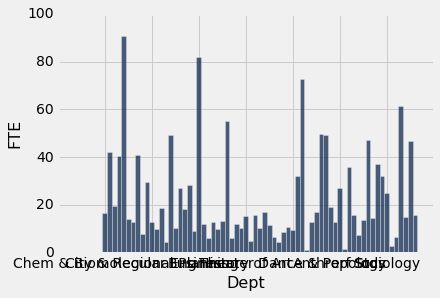

In [182]:
# Operators on tables can be composed - the result of one is provided to the next
# Select two columns of a Table
# Produce a bar plot using one column as labels (or barh to see them all)
#   - the resulting graph is rendered in the document
fte.select(['Dept', 'FTE']).bar('Dept')

Visualization often is essential to understand the data that you are working with, before doing any kind of summarization or analysis

### Computational concept: composition
* Functional composition: use the results of one as input to another
* Sequential composition: give the result of a computation a name and use it in a subsequent computation

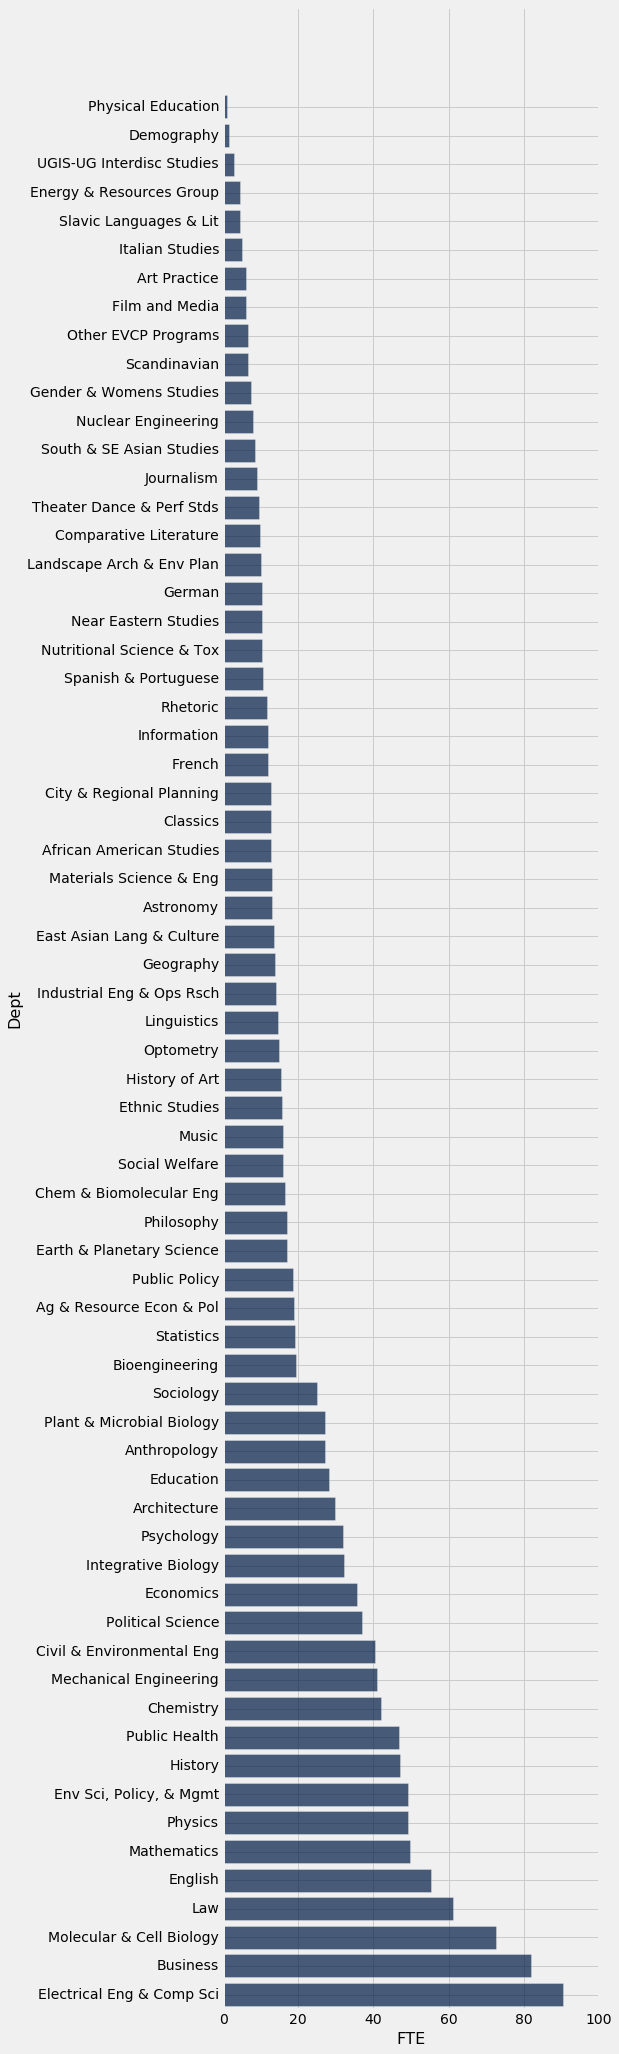

In [183]:
# Operators on tables keep the rows together, for example sorting on
# a column produces a new table with the rows reordered.
# Here we compose that with some visualization
#
# fte.select(['Dept', 'FTE']).sort('FTE').barh('Dept')
dept_fte = fte.select(['Dept', 'FTE'])
sorted_fte = dept_fte.sort('FTE')
sorted_fte.barh('Dept')

### Statistical concept: frequency analysis

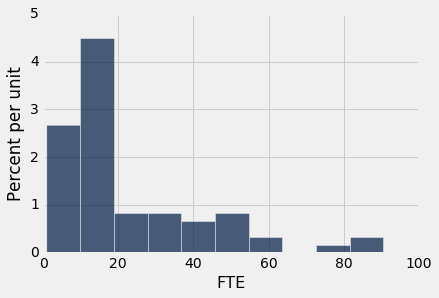

In [184]:
# The data itself is often overwelming in its detail.  Frequency analysis
# seeks to understand patterns, such as what is common and what is rare.

fte.hist('FTE')

Like so many things is life, the 80/20 rule... most departments are small, but the few large ones have a lot in them.

In [185]:
# If you can visualize it, you should be able to compute on the data
# in the visualization... create a table.
fte.bin('FTE')

bin,FTE count
1,16
9.95,27
18.9,5
27.85,5
36.8,4
45.75,5
54.7,2
63.65,0
72.6,1
81.55,2


### Computing on data in a table

In [186]:
# Indexing a table by a column label returns an array containing the data in that column
fte['FTE']

array([ 16.5 ,  42.  ,  19.5 ,  40.5 ,  90.5 ,  14.  ,  13.  ,  41.  ,
         8.  ,  29.75,  12.75,  10.  ,  18.85,   4.5 ,  49.17,  10.33,
        27.  ,  18.5 ,  28.25,   9.  ,  82.  ,  12.  ,   6.  ,  12.75,
         9.75,  13.5 ,  55.25,   6.  ,  12.  ,  10.25,  15.5 ,   5.  ,
        16.  ,  10.25,  17.  ,  11.75,   6.75,   4.5 ,   8.5 ,  10.75,
         9.5 ,  32.25,  72.7 ,   1.  ,  13.  ,  17.  ,  49.75,  49.25,
        19.25,  12.75,  27.  ,   1.5 ,  35.75,  15.75,   7.5 ,  13.75,
        47.  ,  14.5 ,  36.95,  32.  ,  25.  ,   3.  ,   6.5 ,  61.25,
        15.  ,  46.75,  16.  ])

In [187]:
# We can compute on this just like any other data
sum(fte['FTE'])

1510.2500000000002

In [188]:
ave_fte = sum(fte['FTE'])/fte.num_rows
ave_fte

22.541044776119406

In [189]:
# The result of computation can be recorded in the table by assigning the column.
#  - this modifies the table, rather than creating a new one
bins = fte.bin('FTE')
bins['Min Count'] = bins['bin']*bins['FTE count']
bins

bin,FTE count,Min Count
1,16,16
9.95,27,268.65
18.9,5,94.5
27.85,5,139.25
36.8,4,147.2
45.75,5,228.75
54.7,2,109.4
63.65,0,0
72.6,1,72.6
81.55,2,163.1


In [190]:
# Functions are a beautiful way to express categories
nbin = 5
def dept_bin(size):
    return (size//nbin)*nbin

In [191]:
dept_bin(13)

10

### Functions in python
- defined using `def`, the name of the function, and the arguments
- "body" of the function is indented
- `return` statement gives expression of returned value

In [192]:
fte_bin = fte.copy()
fte_bin['bin'] = fte_trend.apply(dept_bin, 'FTE')
fte_bin

Div,Dept,FTE,bin
Clg of Chemistry,Chem & Biomolecular Eng,16.5,15
Clg of Chemistry,Chemistry,42,40
Clg of Engineering,Bioengineering,19.5,15
Clg of Engineering,Civil & Environmental Eng,40.5,40
Clg of Engineering,Electrical Eng & Comp Sci,90.5,90
Clg of Engineering,Industrial Eng & Ops Rsch,14,10
Clg of Engineering,Materials Science & Eng,13,10
Clg of Engineering,Mechanical Engineering,41,40
Clg of Engineering,Nuclear Engineering,8,5
Clg of Env Design,Architecture,29.75,25


### Computing on the data versus the statistical summary

### Grouping and computing aggregates

In [193]:
fte_bin.group('bin')
#fte_bin.group('bin', collect=sum)

bin,count
0,5
5,11
10,17
15,12
25,5
30,2
35,2
40,3
45,5
55,1


In [194]:
# Building a new table "with" additional columns
fte_trends = fte_bin.group('bin').with_column('sum', fte_bin.group('bin', collect=sum)['FTE sum'])
fte_trends

bin,count,sum
0,5,14.5
5,11,82.5
10,17,207.33
15,12,204.85
25,5,137
30,2,64.25
35,2,72.7
40,3,123.5
45,5,241.92
55,1,55.25


In [195]:
# Build this up a column at a time.
# We will use a cumulative sum function from numpy
fte_trends = fte_bin.group('bin').with_column('sum', fte_bin.group('bin', collect=sum)['FTE sum'])
fte_trends['CumCount'] = np.cumsum(fte_trends['count'])
fte_trends['CumFTE'] = np.cumsum(fte_trends['sum'])
fte_trends['Dept Frac'] = fte_trends['CumCount'] / sum(fte_trends['count'])
fte_trends.set_format('Dept Frac', PercentFormatter)
fte_trends['FTE Frac'] = fte_trends['CumFTE'] / sum(fte_trends['sum'])
fte_trends.set_format('FTE Frac', PercentFormatter)
fte_trends

bin,count,sum,CumCount,CumFTE,Dept Frac,FTE Frac
0,5,14.5,5,14.5,7.46%,0.96%
5,11,82.5,16,97,23.88%,6.42%
10,17,207.33,33,304.33,49.25%,20.15%
15,12,204.85,45,509.18,67.16%,33.71%
25,5,137,50,646.18,74.63%,42.79%
30,2,64.25,52,710.43,77.61%,47.04%
35,2,72.7,54,783.13,80.60%,51.85%
40,3,123.5,57,906.63,85.07%,60.03%
45,5,241.92,62,1148.55,92.54%,76.05%
55,1,55.25,63,1203.8,94.03%,79.71%


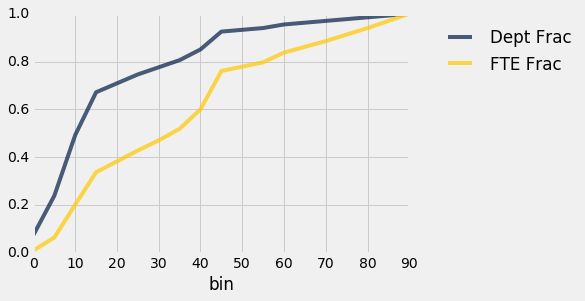

In [196]:
# plot the portion we are interested in
fte_trends.select(['bin', 'Dept Frac', 'FTE Frac']).plot('bin')

Many natural phenomenom result in most of the items are small and comprise little of the total, whereas most of the total is in a few big ones. 

For departments in out study: 
- 2/3rds of the departments contain 1/3rd of the faculty
- 1/3rd of the departments contain 2/3rds of the faculty


## Essential statistical concept simulated in tables - sampling

We want to make sound inferences about a population we generally cannot observe based on sample of the population that we can.

Think of the table as representing the population - here of departments.
The `sample` method take a sample (uniformly at random) from the table.

In [210]:
# Try it over again in the computational document with ctrl-enter
fte.sample(5)

Div,Dept,FTE
L&S-Arts & Humanities Div,Philosophy,17
L&S-Arts & Humanities Div,History of Art,15.5
School of Public Health,Public Health,46.75
L&S-Social Sciences Div,Psychology,32
Clg of Engineering,Mechanical Engineering,41


In [211]:
# Compute on a sample by indexing a column and passing it to a function.
# Try this a few times.
mean(fte.sample(5)['FTE'])

27.689999999999998

## Essential computing concept - abstraction

Take a particular computation on particular objects and values and abstract it into a function that provides a useful tool that can be applied in many situations.

In [212]:
def ave_sample(tbl, col, size):
    return mean(tbl.sample(size)[col])

In [213]:
# Apply this to the fte table on the 'FTE' column
ave_sample(fte, 'FTE', 5)

16.300000000000001

## Essential computing concept - iteration

Create a sequence of values in a systematic fashion

In [214]:
n_samples = 10
[ave_sample(fte, 'FTE', 5) for sample in range(n_samples)]

[18.899999999999999,
 29.300000000000001,
 17.966000000000001,
 19.5,
 32.739999999999995,
 24.649999999999999,
 20.990000000000002,
 36.140000000000001,
 25.140000000000001,
 28.919999999999998]

In [215]:
n_samples = 10
tbl = fte
col = 'FTE'
[ave_sample(tbl, col, 5) for sample in range(n_samples)]

[22.800000000000001,
 10.4,
 16.800000000000001,
 23.84,
 33.0,
 26.850000000000001,
 19.649999999999999,
 25.140000000000001,
 28.899999999999999,
 40.909999999999997]

### Explaining python - comprehension
- a collection of data is obtained by an expression over a variable for each element in a set
- `[` expression `for` variable `in` data `]`


In [216]:
# Create a table object with this column of values, giving it a name
n_samples = 10
tbl = fte
col = 'FTE'
Table().with_column('Ave fte', [ave_sample(tbl, col, 5) for sample in range(n_samples)])

Ave fte
16.966
20.05
15.9
34.8
26
26.59
33.62
33.05
12.95
24.13


In [217]:
# Abstract this whole process
def distr(tbl, col, size, samples):
    col_data = [ave_sample(tbl, col, size) for sample in range(samples)]
    return Table().with_column("ave " + col, col_data)

In [218]:
# Apply it as a general tool to create a table
distr(fte, 'FTE', 5, 100)

ave FTE
20.7
35.75
22.9
22.716
10.55
24.45
29.15
34.316
25.25
14.25


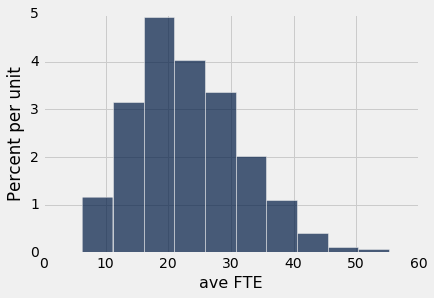

In [219]:
# Compute a sample distribution by obtaining lots of samples, computing a statistic on each
# and forming a histogram of those
fte_distr = distr(fte, 'FTE', 5, 1000)
fte_distr.hist()

In [220]:
# What if we did statistics on this?
fte_distr.stats(ops=[min, mean, max])

statistic,ave FTE
min,6.25
mean,23.0899
max,55.25


In [224]:
ave_fte
# What is that showing?

22.541044776119406

In [228]:
def show_ave_fte_dist(samples):
    ave_fte_distr = distr(fte, 'FTE', 5, samples)
    ave_fte_distr.hist()
    #print(mean(ave_fte_distr['ave FTE']))

<function __main__.show_ave_fte_dist>

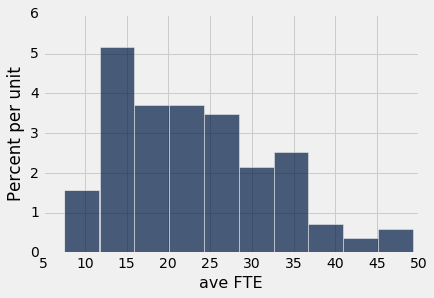

In [229]:
interact(show_ave_fte_dist, samples=(10,400,10))

## Reaching some conclusions and presenting them

We have learned a lot about the structure of departments.  Lots of little ones, but most of the faculty are in large ones.  

From this understanding, we might want to build a little tool for constructing a committee as a stratified sample of departments, say two small one, one middle size, and one large.

In [241]:
def categorize_dept(fte):
    if fte < 15:
        return 'Small'
    elif fte > 45:
        return 'Big'
    else:
        return 'Medium'

In [242]:
fte['Size'] = fte.apply(categorize_dept, 'FTE')
fte

Div,Dept,FTE,Size
Clg of Chemistry,Chem & Biomolecular Eng,16.5,Medium
Clg of Chemistry,Chemistry,42,Medium
Clg of Engineering,Bioengineering,19.5,Medium
Clg of Engineering,Civil & Environmental Eng,40.5,Medium
Clg of Engineering,Electrical Eng & Comp Sci,90.5,Big
Clg of Engineering,Industrial Eng & Ops Rsch,14,Small
Clg of Engineering,Materials Science & Eng,13,Small
Clg of Engineering,Mechanical Engineering,41,Medium
Clg of Engineering,Nuclear Engineering,8,Small
Clg of Env Design,Architecture,29.75,Medium


In [234]:
fte.where('Size', 'Small').sample(2)

Div,Dept,FTE,Size
L&S-Arts & Humanities Div,Comparative Literature,9.75,Small
Other EVCP Programs,Other EVCP Programs,6.5,Small


In [243]:
fte.where('Size', 'Small').sample(2).append(fte.where('Size', 'Medium').sample(1)).append(fte.where('Size', 'Big').sample(1))

Div,Dept,FTE,Size
L&S-Arts & Humanities Div,Film and Media,6,Small
L&S-Social Sciences Div,Geography,13.75,Small
L&S-Social Sciences Div,Anthropology,27,Medium
School of Public Health,Public Health,46.75,Big


## Appendix

Zipf law - for many natural processes rank and frequency are inversely proportional.
What about department sizes?

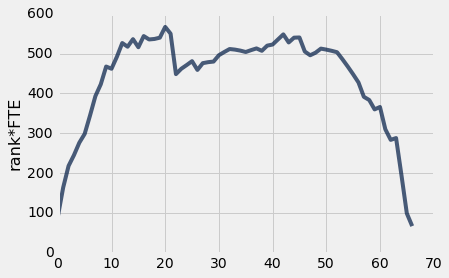

In [223]:
# Really too small a data set for this, but its interesting.
ordered_fte = fte.sort('FTE', descending = True)
ordered_fte['rank'] = np.array(range(ordered_fte.num_rows))+1
ordered_fte['rank*FTE'] = ordered_fte['rank'] * ordered_fte['FTE']
ordered_fte.select('rank*FTE').plot()